In [1]:
"""Uber Trips Analysis using Python"""
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sn
import os

In [2]:
os.chdir('C:\\Users\\Islam.Mammadov\\Desktop\\py')
os.getcwd()

'C:\\Users\\Islam.Mammadov\\Desktop\\py'

In [3]:
data = pd.read_csv("uber.csv")

In [4]:
print(data.head())

          Date/Time      Lat      Lon    Base
0  9/1/2014 0:01:00  40.2201 -74.0021  B02512
1  9/1/2014 0:01:00  40.7500 -74.0027  B02512
2  9/1/2014 0:03:00  40.7559 -73.9864  B02512
3  9/1/2014 0:06:00  40.7450 -73.9889  B02512
4  9/1/2014 0:11:00  40.8145 -73.9444  B02512


In [5]:
data["Date/Time"] = data["Date/Time"].map(pd.to_datetime) 

In [6]:
data.head()

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512


In [12]:
data["Day"] = data["Date/Time"].apply(lambda x: x.day)
data["Weekday"] = data["Date/Time"].apply(lambda x: x.weekday())
data["Hour"] = data["Date/Time"].apply(lambda x: x.hour)
print(data.head())

            Date/Time      Lat      Lon    Base  Day  Weekday  Hour
0 2014-09-01 00:01:00  40.2201 -74.0021  B02512    1        0     0
1 2014-09-01 00:01:00  40.7500 -74.0027  B02512    1        0     0
2 2014-09-01 00:03:00  40.7559 -73.9864  B02512    1        0     0
3 2014-09-01 00:06:00  40.7450 -73.9889  B02512    1        0     0
4 2014-09-01 00:11:00  40.8145 -73.9444  B02512    1        0     0


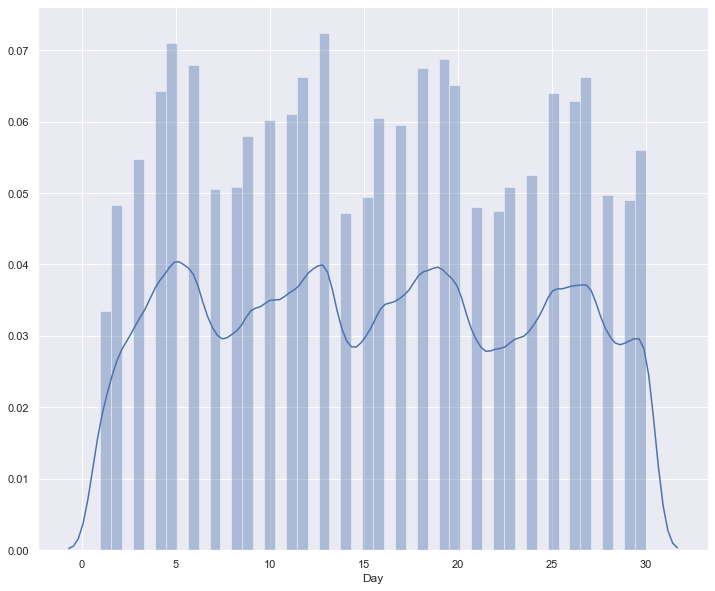

In [13]:
sn.set (rc = {'figure.figsize': (12,10)})
sn.distplot(data["Day"])

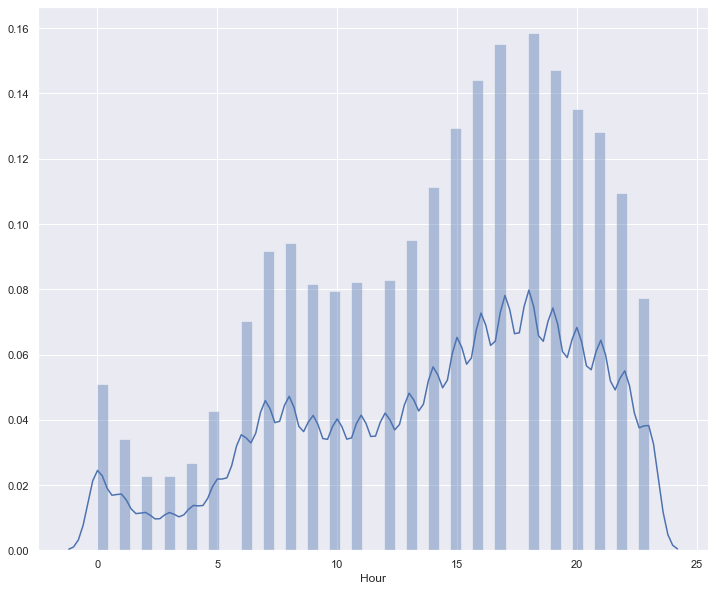

In [14]:
sn.distplot(data["Hour"])

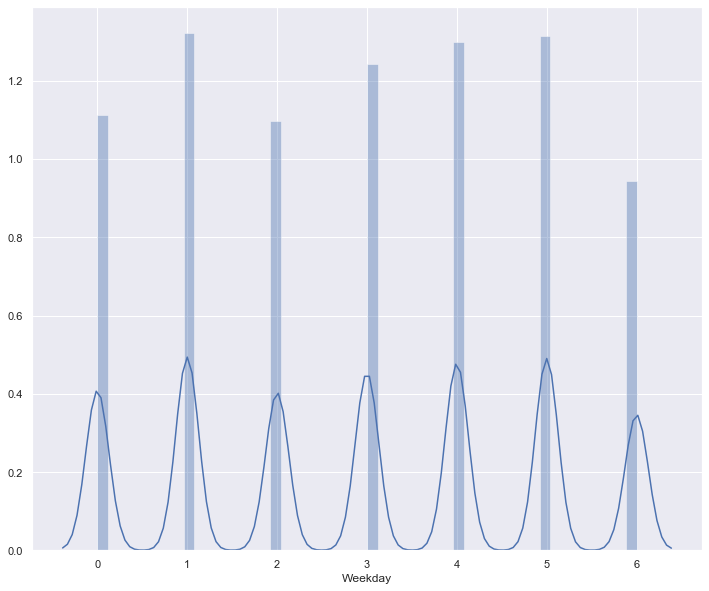

In [16]:
sn.distplot(data["Weekday"])

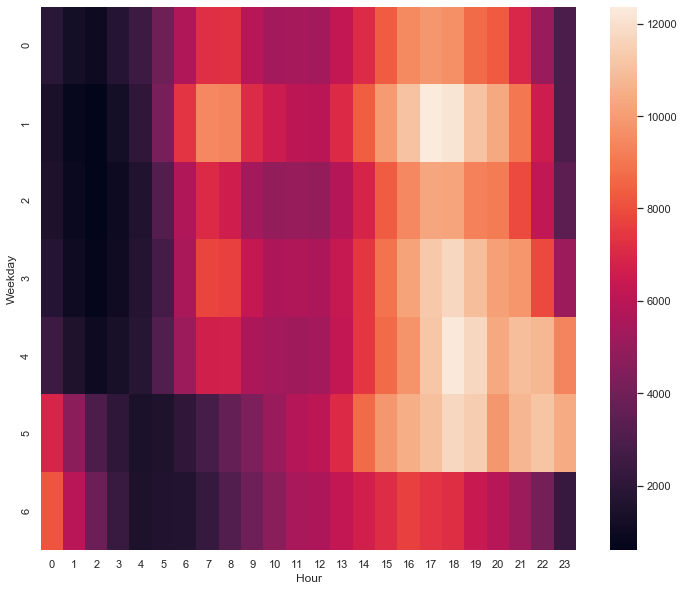

In [17]:
# Correlation of Weekday and Hour
df = data.groupby(["Weekday", "Hour"]).apply (lambda x: len(x))
df = df.unstack()
sn.heatmap(df, annot=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


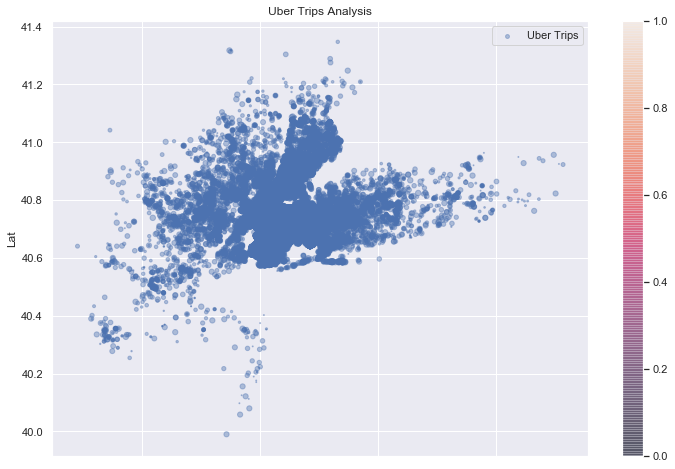

In [23]:
data.plot(kind='scatter', x='Lon', y='Lat', alpha = 0.4, s=data['Day'], label='Uber Trips', figsize=(12,8), cmap=plt.get_cmap('jet'))
plt.title("Uber Trips Analysis")
plt.legend()
plt.show()